In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score



In [2]:
# suppress warnings

import warnings
warnings.filterwarnings("ignore")



In [3]:
# find library versions

from importlib.metadata import version
import sys

print('pandas - version', version('pandas'))
print('numpy - version', version('numpy'))
print('statsmodel - version', version('statsmodels'))
print('sklearn - version', version('scikit-learn'))
# Removed the line that tries to get the version of 'python' as it's not a valid package
print('Python - version', sys.version)  # This correctly prints the Python version

pandas - version 2.0.3
numpy - version 1.24.3
statsmodel - version 0.14.0
sklearn - version 1.3.0
Python - version 3.11.5 (main, Sep 11 2023, 13:54:46) [GCC 11.2.0]


In [4]:
# data file to be uploaded 

file="day.csv"



#### Data Dictionary

==========================
Dataset characteristics
========================	
<br><br><br>day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

##### References:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}


#### Steps to be executed to design the model

    1. Reading, Understanding and Visualising Data
    2. Prepraring the data for modelling
    3. Training the model
    4. Residual Analysis
    5. Predictions and evaluation of the test set

## Reading, Understanding and Visualising Data

In [8]:

# load data
data = pd.read_csv(file)
data.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Check shape of the data
data.shape



(730, 16)

In [10]:
# Check if there are any nulls
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [155]:
# check various statistical values for numerical columns

data.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Summer,Winter,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist/Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.084932,0.084932,0.076712,...,0.252055,0.243836,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.278971,0.278971,0.266317,...,0.434490,0.429689,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,2018.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2019.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [157]:
data['temp'].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99,1])

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
50%       20.465826
75%       26.880615
90%       29.998347
95%       31.520460
99%       33.868050
100%      35.328347
max       35.328347
Name: temp, dtype: float64

In [11]:
# correcting the data type of column dteday from object to datetime

data.dteday = pd.to_datetime(data['dteday'], format='%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Observations on data

- All columns except dteday had non standard data type.
- All columns are numeric (int or float) in the data set
- There are no null values

In [13]:
data.describe()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


#### Data Cleaning
- Column with name "instant" is record index and holds no value. Hence, it will be removed
- There are three columns named holiday, weekday and working day. Function of these columns can be merged into single column that will hold value 0 or 1 describing 0 as no holiday and 1 as holiday

In [15]:
data.drop('instant',axis=1,inplace=True)



In [16]:

data.head()



,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<Figure size 2000x2000 with 0 Axes>

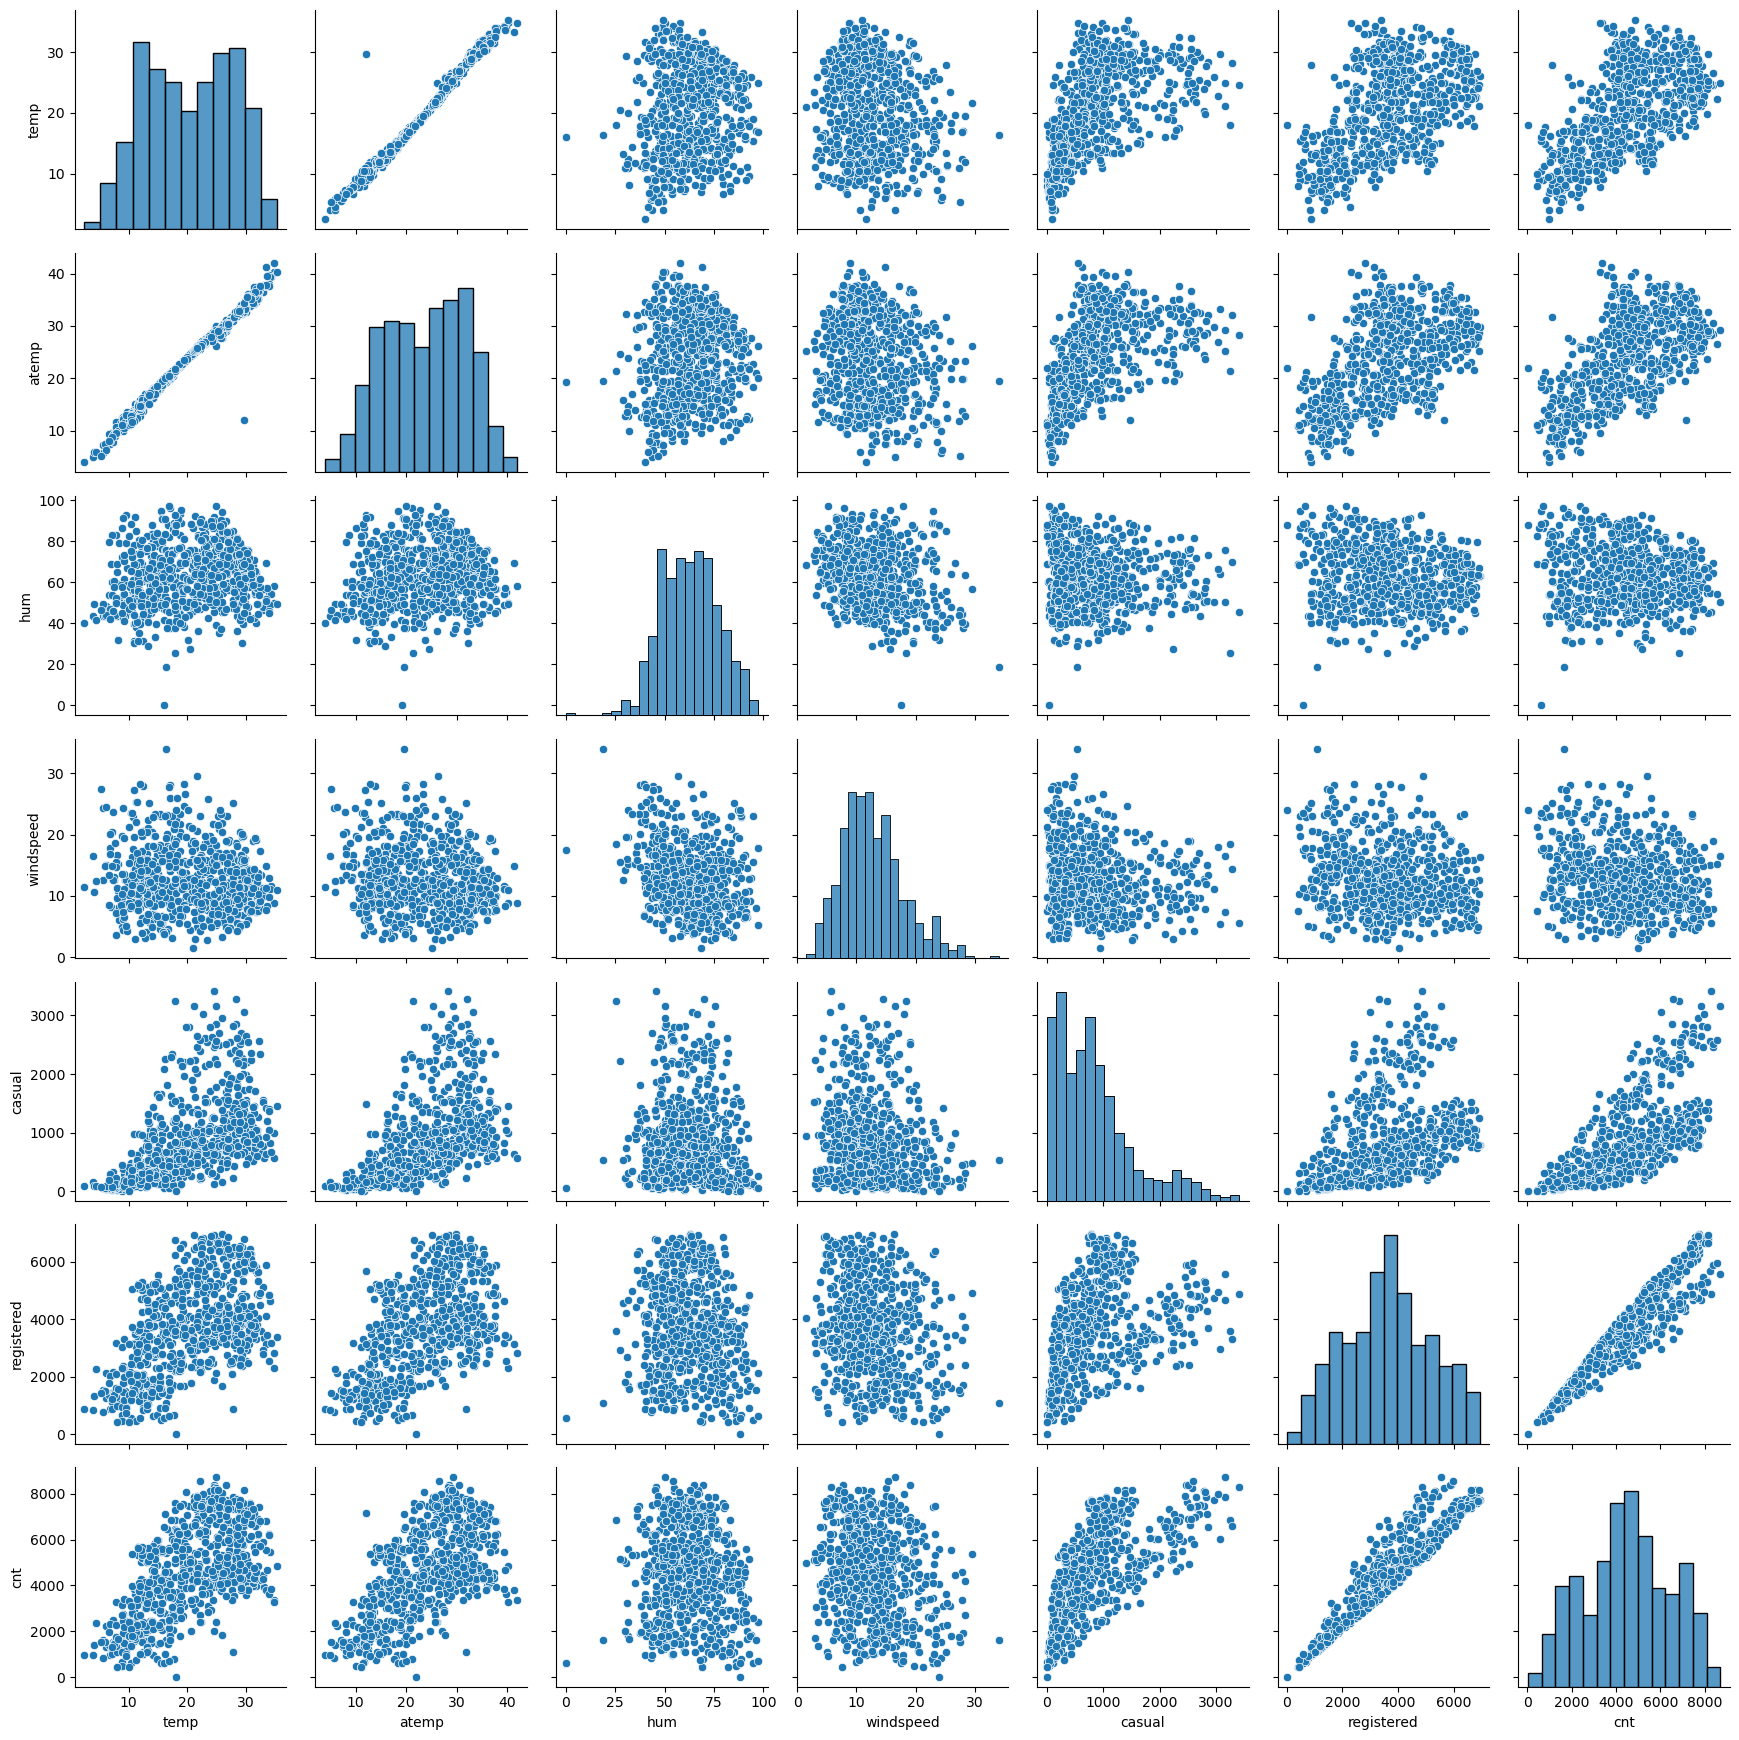

In [17]:
# Make a pair plot of numerical (non categorical) variables

plt.figure(figsize=(20,20) )
sns.pairplot(data[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.tight_layout()
plt.show()



#### _Here are observations from the pair plots:_

1. _Variable cnt is strongly related to numerical variables temperature, humidity and windspeed_
2. _There is no explicit affect of feeling temperature (atemp) on count variable_
3. _Independent variables registered and casual are redundant as we will be looking at overall users_

In [19]:
# View on categorical variables

data.mnth = data['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data.season = data['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
data.weathersit = data['weathersit'].map({1:'Clear', 2:'Mist/Cloudy', 3:'Light Snow', 4:'Heavy Rain'})
data.weekday = data['weekday'].map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat', 0:'Sun'})
data.yr = data['yr'].map({0:'2018', 1:'2019'})
data.holiday = data.holiday.map({1:'Yes', 0:'No'})
data.head()



,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,2018,Jan,No,Sat,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,Spring,2018,Jan,No,Sun,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,Spring,2018,Jan,No,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,Spring,2018,Jan,No,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,Spring,2018,Jan,No,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


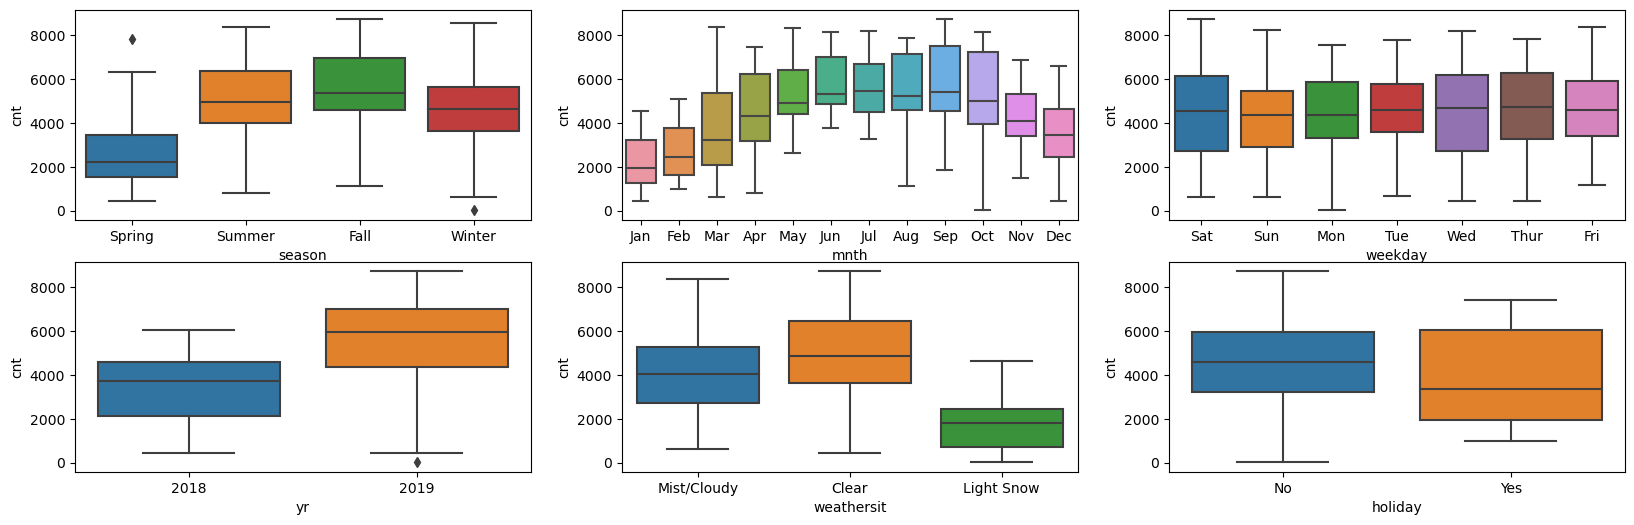

In [20]:
### visualising categorical variables
plt.figure(figsize=(20, 6))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)

plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)

plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)

plt.subplot(2,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = data)

plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)

plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)

plt.show()



#### _Here are observations from the box plots:_

1. _Maximum rides happen during the Summer and Fall seasons_
2. _Bike users are highest in September and October_
3. _Wedenesday and Saturday account for most bike users_
4. _There is significant growth in the second year i.e. 2019_
5. _People prefer riding bikes when the skies are clear. Some users ride of cloudy weathers as well however no users in case of heavy rains or snow. Lightly wet or snowly days attract only a handful of users_
6. _Median of users on non-holidays is high implying that most of the users use bikes during working days however IQR is high during holidays meaning casual/recreational users become active during holidays_


In [22]:
# dropping columns that we are not going to use

drop_cols = ['casual','registered','atemp','dteday']
data.drop(drop_cols, inplace=True, axis=1)



In [23]:
data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Sat,0,Mist/Cloudy,14.110847,80.5833,10.749882,985
1,Spring,2018,Jan,No,Sun,0,Mist/Cloudy,14.902598,69.6087,16.652113,801
2,Spring,2018,Jan,No,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,2018,Jan,No,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,2018,Jan,No,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [24]:
# Create dummy variables for categorical columns
month_dummy = pd.get_dummies(data['mnth'], drop_first=True, dtype=int)


In [25]:

month_dummy


,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [26]:

season_dummy = pd.get_dummies(data['season'], drop_first=True, dtype=int)
weekday_dummy = pd.get_dummies(data['weekday'], drop_first=True, dtype=int)
weathersit_dummy = pd.get_dummies(data['weathersit'], drop_first=True, dtype=int)



In [27]:

# concatenate dummy variables into the dataframe

data = pd.concat([data,month_dummy,season_dummy,weekday_dummy,weathersit_dummy], axis=1)
data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Summer,Winter,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist/Cloudy
0,Spring,2018,Jan,No,Sat,0,Mist/Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,Spring,2018,Jan,No,Sun,0,Mist/Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,Spring,2018,Jan,No,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,Spring,2018,Jan,No,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,Spring,2018,Jan,No,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [28]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Spring',
       'Summer', 'Winter', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed',
       'Light Snow', 'Mist/Cloudy'],
      dtype='object')

In [29]:
# drop the columns for which dummies have been created

drop_cols = ['mnth','season','weekday','weathersit']
data.drop(columns=drop_cols, inplace=True)
data.head()



,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Summer,Winter,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist/Cloudy
0,2018,No,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2018,No,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2018,No,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2018,No,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,No,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:

holiday_dummy = pd.get_dummies(data['holiday'], drop_first=True, dtype=int)
holiday_dummy



,Yes
0,0
1,0
2,0
3,0
4,0
...,...
725,0
726,0
727,0
728,0


In [31]:

data.holiday = data.holiday.map({'Yes':1,'No':0})
data.head()



,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Summer,Winter,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist/Cloudy
0,2018,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2018,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2018,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    object 
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   hum          730 non-null    float64
 5   windspeed    730 non-null    float64
 6   cnt          730 non-null    int64  
 7   Aug          730 non-null    int64  
 8   Dec          730 non-null    int64  
 9   Feb          730 non-null    int64  
 10  Jan          730 non-null    int64  
 11  Jul          730 non-null    int64  
 12  Jun          730 non-null    int64  
 13  Mar          730 non-null    int64  
 14  May          730 non-null    int64  
 15  Nov          730 non-null    int64  
 16  Oct          730 non-null    int64  
 17  Sep          730 non-null    int64  
 18  Spring       730 non-null    int64  
 19  Summer  

In [33]:

data['yr'] = data['yr'].apply(lambda x:int(x))



In [34]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   hum          730 non-null    float64
 5   windspeed    730 non-null    float64
 6   cnt          730 non-null    int64  
 7   Aug          730 non-null    int64  
 8   Dec          730 non-null    int64  
 9   Feb          730 non-null    int64  
 10  Jan          730 non-null    int64  
 11  Jul          730 non-null    int64  
 12  Jun          730 non-null    int64  
 13  Mar          730 non-null    int64  
 14  May          730 non-null    int64  
 15  Nov          730 non-null    int64  
 16  Oct          730 non-null    int64  
 17  Sep          730 non-null    int64  
 18  Spring       730 non-null    int64  
 19  Summer  

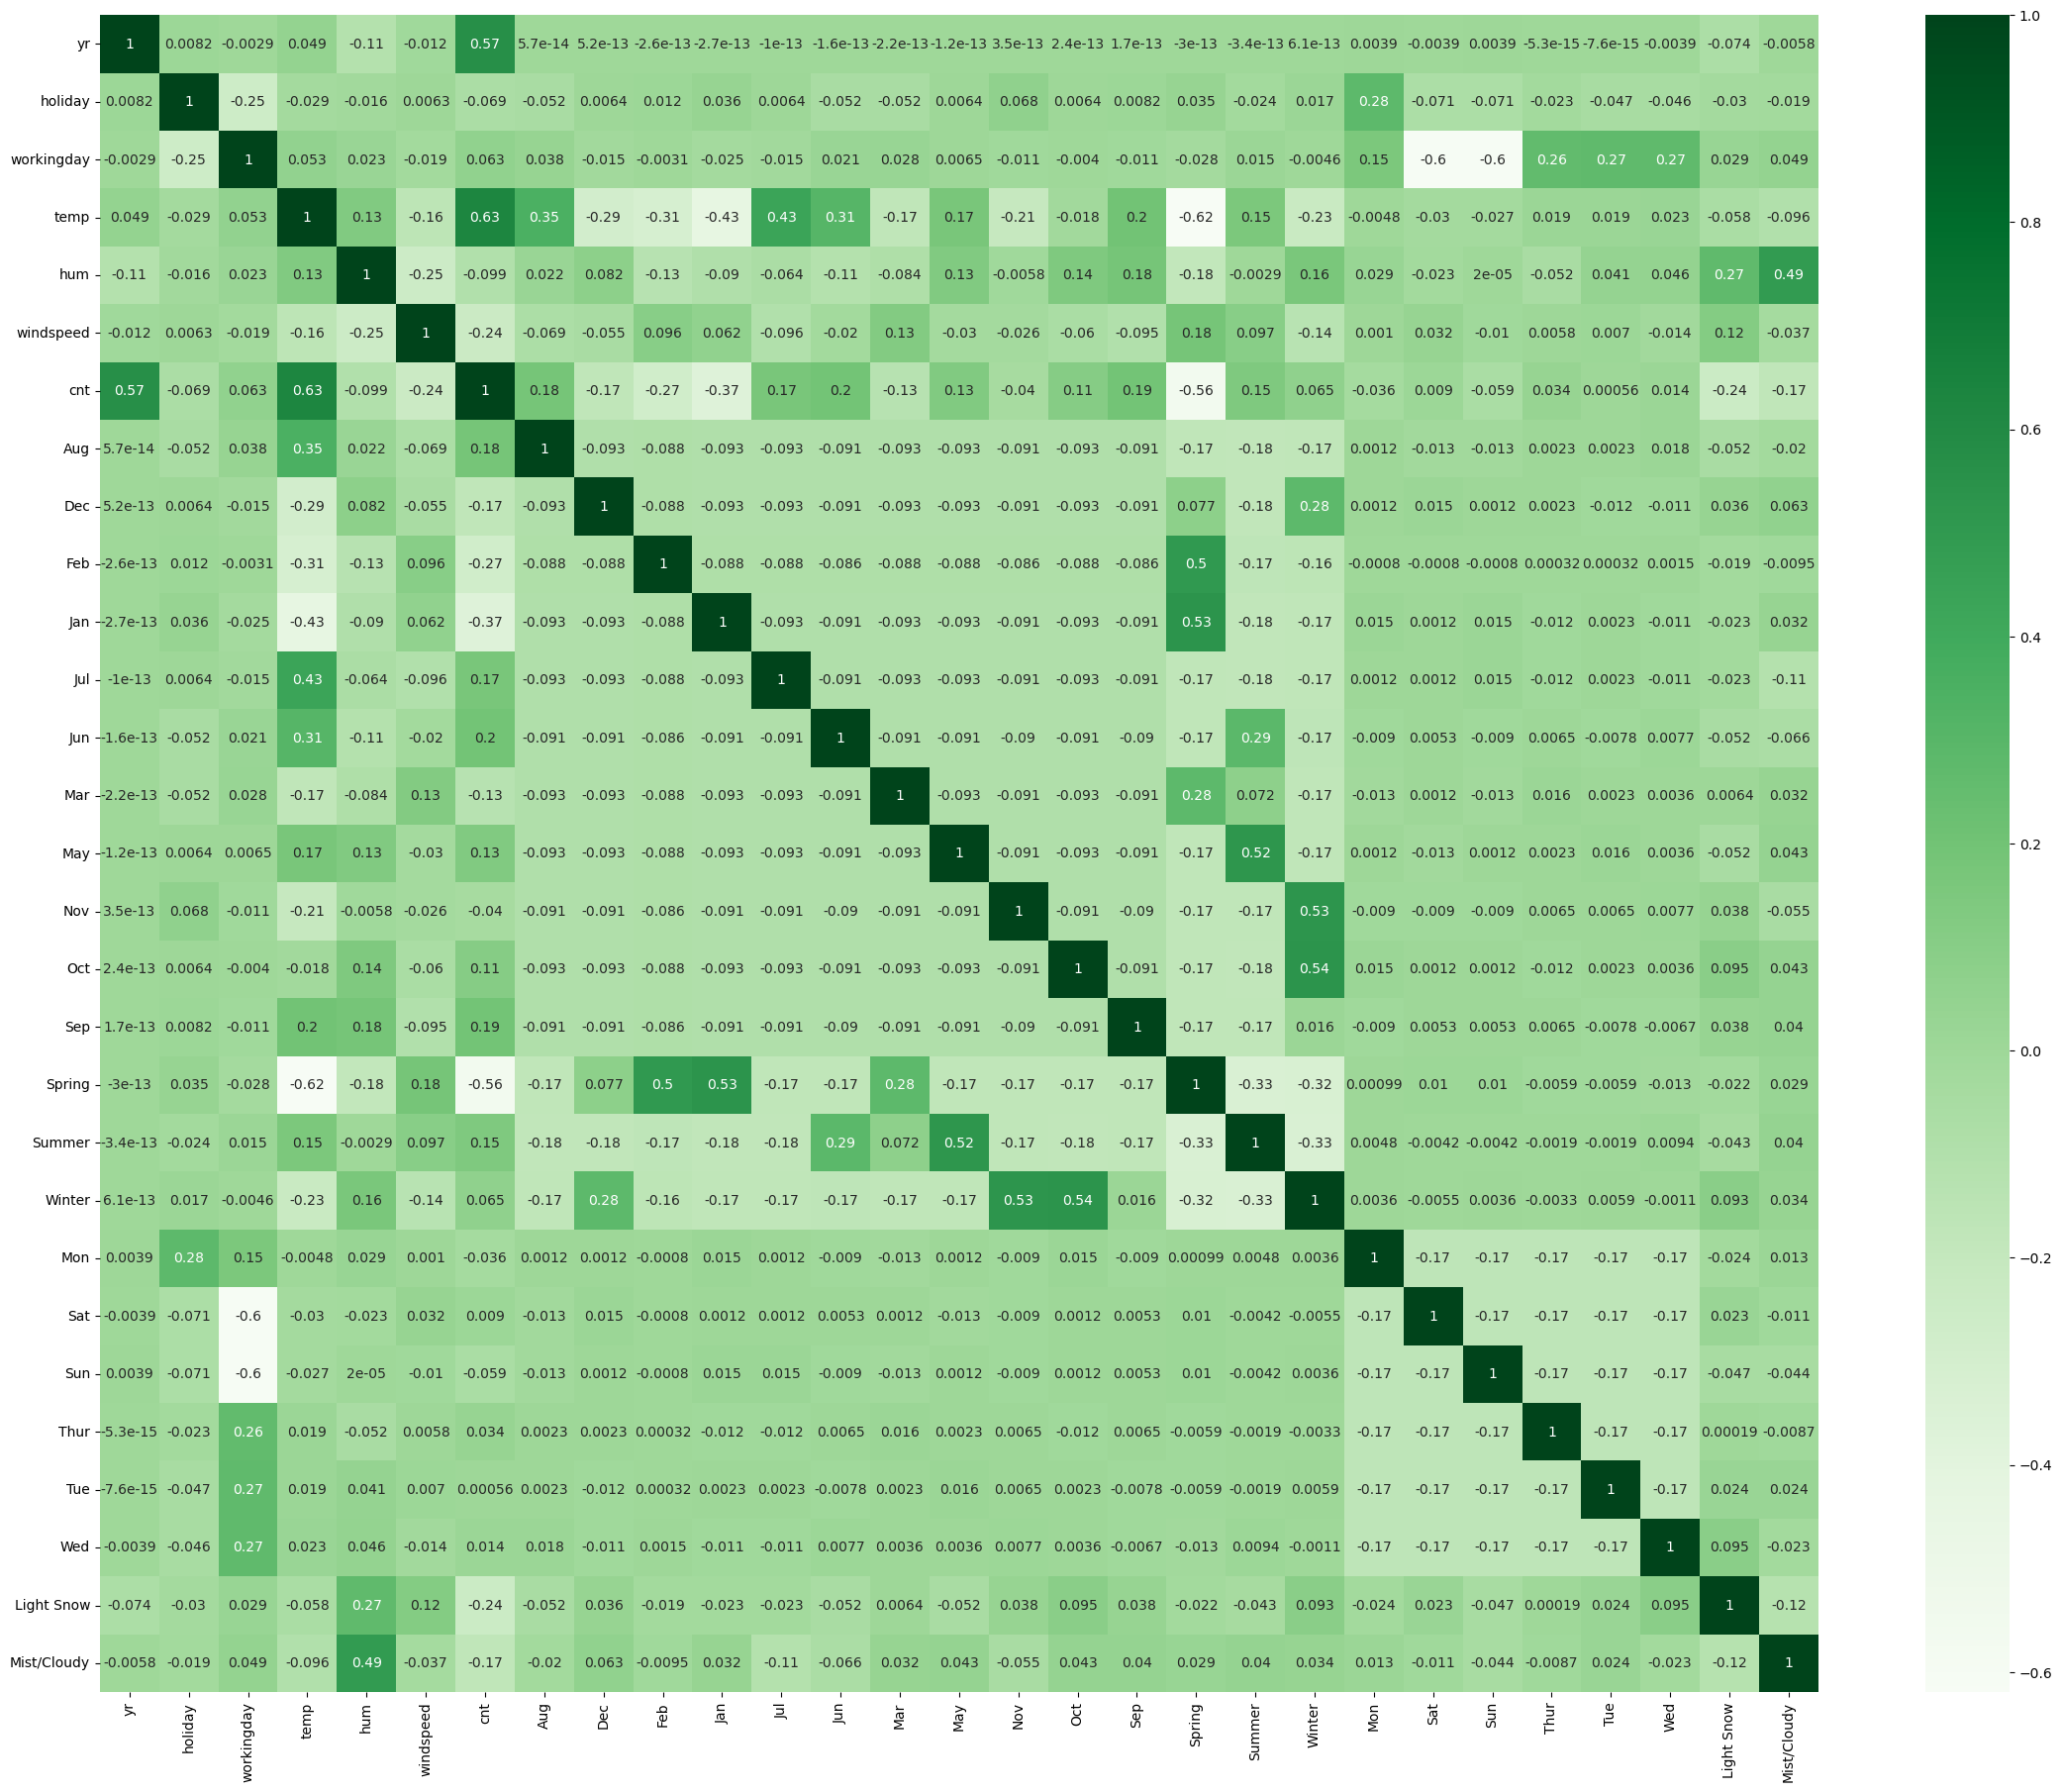

In [35]:
# create a heatmap

plt.figure(figsize=(28,22))
sns.heatmap(data.corr(), cmap="Greens", annot=True)
plt.show()



## Prepraring the data for modelling

In [37]:

# test-train split
data_train, data_test = train_test_split(data, train_size=0.70, random_state=100)
print(data_train.shape)
print(data_test.shape)


(510, 29)
(220, 29)


In [38]:

# Scale the data using min-max technique

scaler = MinMaxScaler()

# columns to be scaled
sc_cols = ['temp','hum','windspeed','cnt']

data_train[sc_cols] = scaler.fit_transform(data_train[sc_cols])



In [39]:

# describe to verify that min and max values for all columns falls between 0 and 1
data_train.describe()


,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Summer,Winter,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist/Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2018.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.247059,0.247059,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.431725,0.431725,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


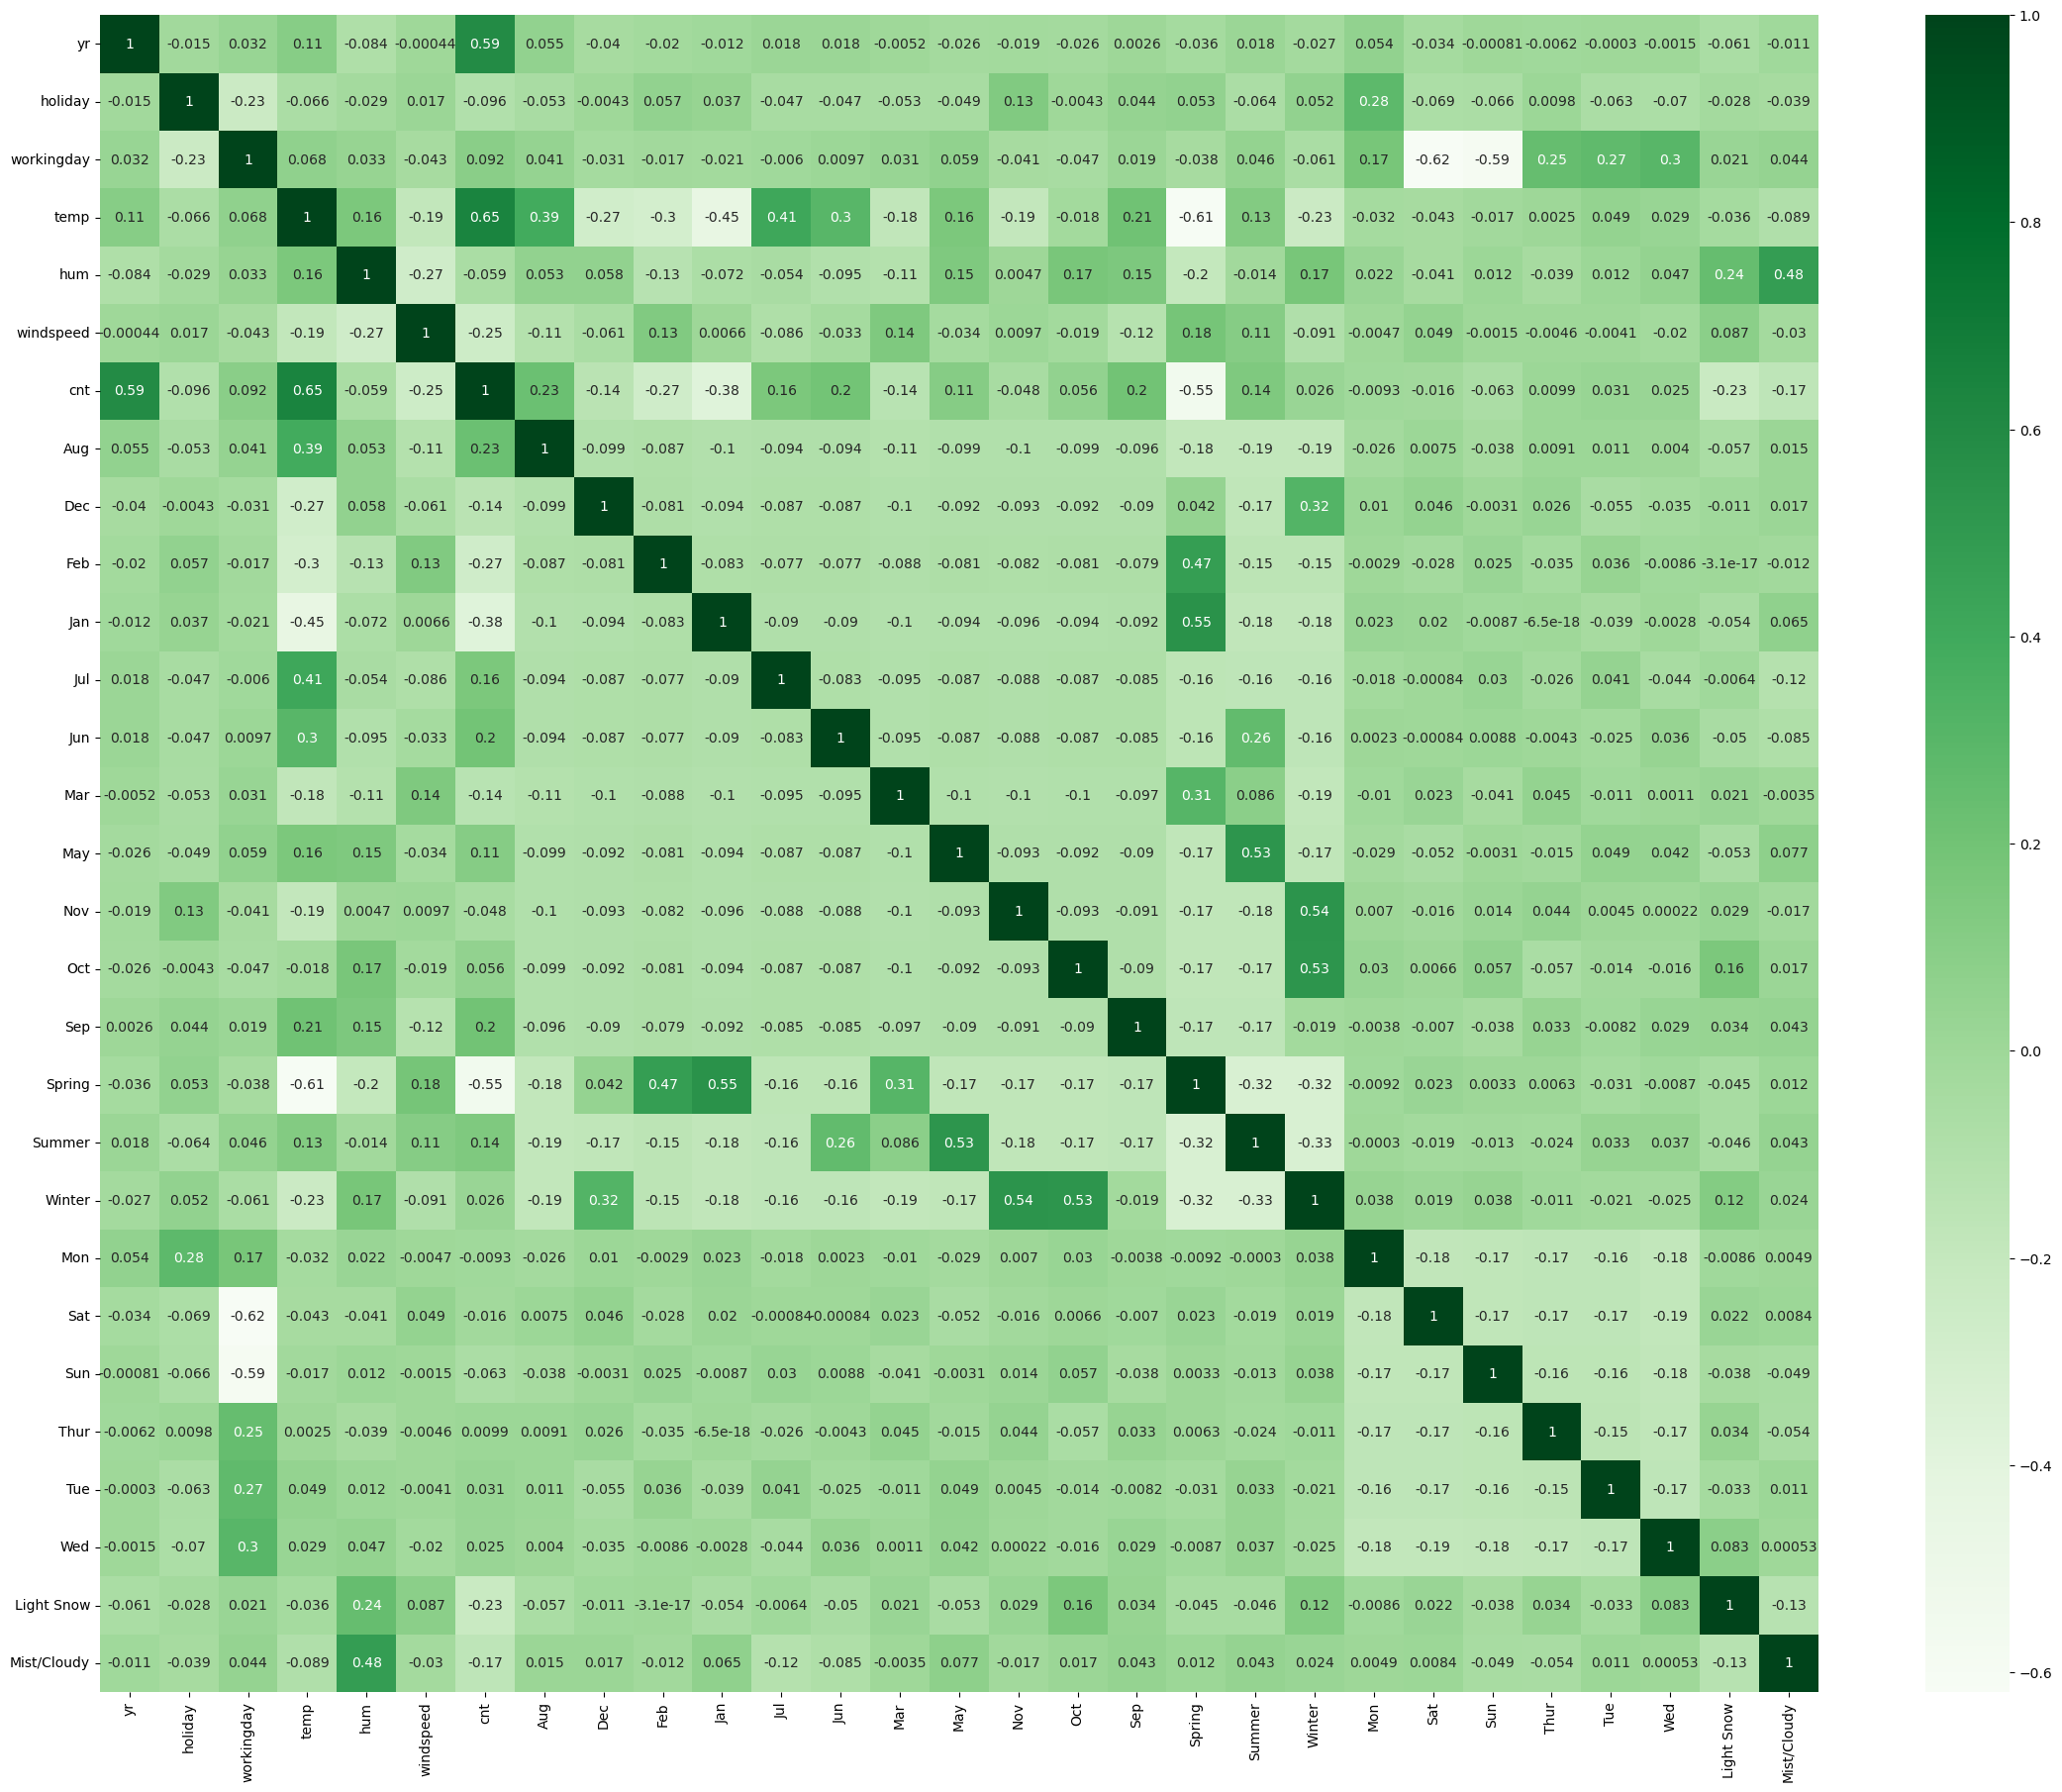

In [40]:
# generate a heatmap

plt.figure(figsize = (28, 22))
sns.heatmap(data_train.corr(), annot = True, cmap="Greens")
plt.show()



<Axes: >

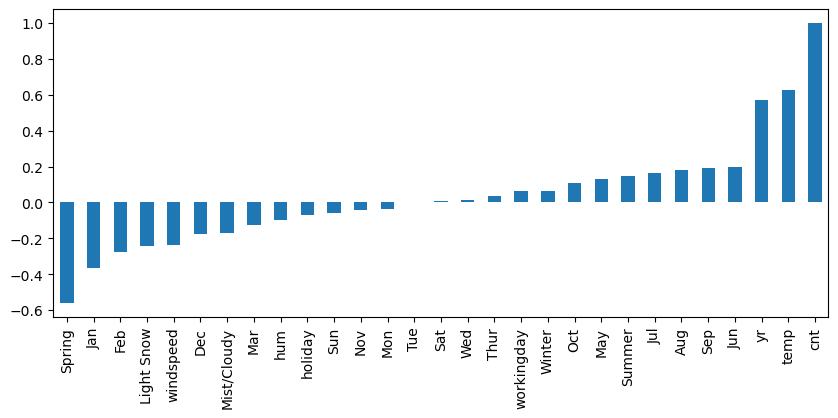

In [41]:

# assess the correlation of other variables with dependent variables
data.corr()['cnt'].sort_values().plot(kind="bar", figsize=(10,4))


## Training the model

In [43]:
# Create reusable methods 

def generateLRSummary(X_train: pd.DataFrame, colList: list, y_train):
    #print (X_train.shape, colList, y_train)
    X_train_sm = sm.add_constant(X_train[colList])
    lr = sm.OLS(y_train, X_train_sm)
    lr_model = lr.fit()
    print(lr_model.summary())
    return X_train_sm, lr_model


def generateVIF(X_train: pd.DataFrame):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)



In [44]:

# define X_train and y_train
y_train = data_train.pop('cnt')
X_train = data_train


#### Manual selection of independent variables to draw the model

In [46]:
# Generate a linear regression summary for temperature column as it appears to be most significant

X_train_sm , lr = generateLRSummary(X_train, 'temp', y_train)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           2.46e-61
Time:                        23:18:36   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.0

#### Observations:
1. R-square value is 0.416 implying that bike 41.6% extent of users count is explained by temperature
2. p-value is 0

Temperature is significant variable

In [48]:

# Generate Linear regression model using another variable called year
col_list = ['temp','yr']
X_train_sm , lr = generateLRSummary(X_train, col_list, y_train)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          3.34e-130
Time:                        23:18:36   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -477.6591     22.459    -21.268      0.0

In [49]:

# Using all the indenpendent variables
X_train_sm, lr = generateLRSummary(X_train, X_train.columns, y_train)

generateVIF(X_train_sm)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          3.00e-181
Time:                        23:18:36   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -375.0041     13.023    -28.796      

#### Observations:
1. R-squared value is 85.3% implying 85.3% of variance in the number of bike users is explained by all independent variables
2. There are a few variables that have very high p-values that we may have to elimiate

#### Generating model using automated method (RFE) 
##### and using hybrid approach to broadly select independent variables using RFE following by manual elimination

In [52]:
X_train.shape

(510, 28)

In [53]:
# There are a 28 independent variables. using RFE, we shall select top 15 and then work towards shrinking 

# Instantiate LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)

rfe.fit(X_train, y_train)



RFE(estimator=LinearRegression(), n_features_to_select=15)

In [54]:
# find the selected variables with their rankings

list(zip(X_train.columns, rfe.support_, rfe.ranking_))



[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', False, 13),
 ('Jun', False, 7),
 ('Mar', False, 14),
 ('May', False, 4),
 ('Nov', False, 2),
 ('Oct', False, 6),
 ('Sep', True, 1),
 ('Spring', False, 5),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thur', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist/Cloudy', True, 1)]

In [55]:

col = X_train.columns[rfe.support_]
print(col)



Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Aug', 'Dec',
       'Jan', 'Sep', 'Summer', 'Winter', 'Sat', 'Light Snow', 'Mist/Cloudy'],
      dtype='object')


In [56]:

# take the selected columns in a new dataframe 
X_train_rfe = X_train[col]
X_train_rfe.shape



(510, 15)

In [57]:

# Build the model using statsmodel

generateLRSummary(X_train_rfe, X_train_rfe.columns, y_train)

generateVIF(X_train_rfe)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.8
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          5.41e-191
Time:                        23:18:37   Log-Likelihood:                 519.39
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -463.8658     16.128    -28.762      

In [58]:

# Drop Aug as it is strongly related to temp and can affect this

X_train_new1 = X_train_rfe.drop(['Aug'], axis = 1)

generateLRSummary(X_train_new1, X_train_new1.columns, y_train)

generateVIF(X_train_new1)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.9
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          4.46e-190
Time:                        23:18:37   Log-Likelihood:                 514.45
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     495   BIC:                            -935.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -464.7100     16.266    -28.570      

In [59]:
# Drop Dec due to high p-value

X_train_new2 = X_train_new1.drop(['Dec'], axis = 1)

generateLRSummary(X_train_new2, X_train_new2.columns, y_train)

generateVIF(X_train_new2)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.1
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          8.66e-191
Time:                        23:18:37   Log-Likelihood:                 513.37
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     496   BIC:                            -939.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -464.5168     16.283    -28.527      

In [60]:

# Drop holiday due to high p-value

X_train_new3 = X_train_new2.drop(['holiday'], axis = 1)

generateLRSummary(X_train_new3, X_train_new3.columns, y_train)

generateVIF(X_train_new3)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.4
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          5.17e-191
Time:                        23:18:37   Log-Likelihood:                 511.09
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     497   BIC:                            -941.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -464.8919     16.339    -28.453      

In [61]:
# Drop Jan due to high p-value

X_train_new4 = X_train_new3.drop(['Jan'], axis = 1)

generateLRSummary(X_train_new4, X_train_new4.columns, y_train)

generateVIF(X_train_new4)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          5.10e-191
Time:                        23:18:37   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -462.8464     16.390    -28.239      

In [62]:
# Drop Hum due to high VIF

X_train_new5 = X_train_new4.drop(['hum'], axis = 1)

generateLRSummary(X_train_new5, X_train_new5.columns, y_train)

generateVIF(X_train_new5)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          3.13e-188
Time:                        23:18:37   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -470.3999     16.586    -28.361      

In [63]:

# Drop workingday due to high VIF

X_train_new6 = X_train_new5.drop(['workingday'], axis = 1)

generateLRSummary(X_train_new6, X_train_new6.columns, y_train)

generateVIF(X_train_new6)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.5
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          3.99e-184
Time:                        23:18:37   Log-Likelihood:                 486.20
No. Observations:                 510   AIC:                            -952.4
Df Residuals:                     500   BIC:                            -910.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -471.3860     16.982    -27.757      

In [64]:

# Drop windspeed due to high VIF

X_train_new7 = X_train_new6.drop(['windspeed'], axis = 1)

X_train_sm, lr = generateLRSummary(X_train_new7, X_train_new7.columns, y_train)

generateVIF(X_train_new7)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     273.9
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          1.72e-177
Time:                        23:18:37   Log-Likelihood:                 467.67
No. Observations:                 510   AIC:                            -917.3
Df Residuals:                     501   BIC:                            -879.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -468.7818     17.588    -26.654      

## Residual Analysis

In [66]:

# add a constant
X_train_sm = sm.add_constant(X_train_new7)


In [67]:

# predict the y_train
y_train_pred = lr.predict(X_train_sm)



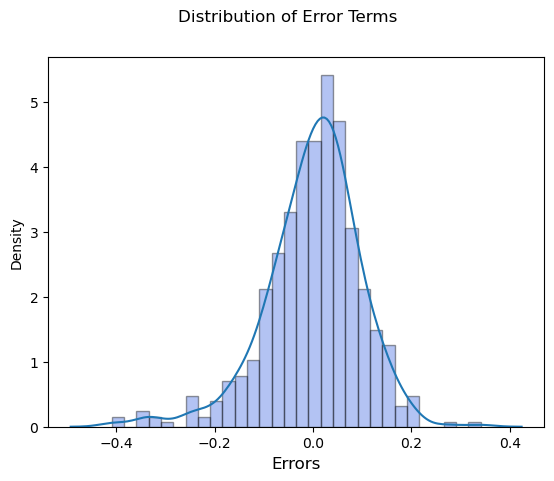

In [68]:

# find the residuals and plot them to assess error distribution

res = y_train - y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 30, hist_kws={'edgecolor':'black', 'color':'royalblue'} )
fig.suptitle('Distribution of Error Terms', fontsize = 12)                 
plt.xlabel('Errors', fontsize = 12)  
plt.show()



#### Observations:
- Error terms are normally distributed
- Mean is very close to zero
- There is slight skewless on the left 

In [70]:

# mean of residuals
(y_train-y_train_pred).mean()


-6.703191378871417e-13

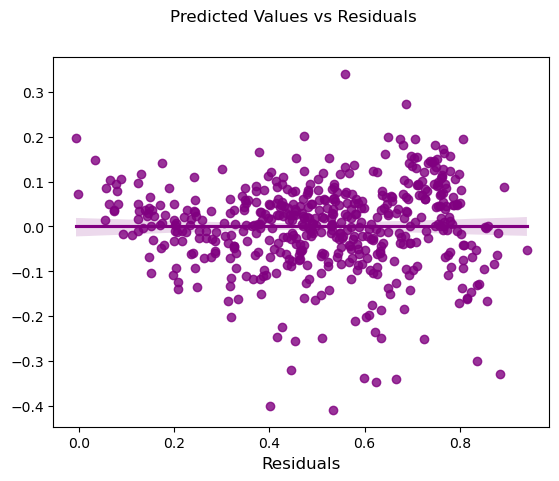

In [71]:

# Distribution of restuals in reg plot

fig = plt.figure()
sns.regplot(x=y_train_pred, y=res, data=data_train, color='purple')
fig.suptitle('Predicted Values vs Residuals', fontsize = 12)                   
plt.xlabel('Residuals', fontsize = 12)
plt.show()


## Making Predictions & Model Evaluation

In [73]:

# scale the columns in test set 
sc_cols


['temp', 'hum', 'windspeed', 'cnt']

In [74]:

data_test[sc_cols] = scaler.transform(data_test[sc_cols])


In [75]:

data_test.describe()


,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Summer,Winter,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist/Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2018.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,2018.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2019.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:

# create X_test and y_test from test data set  

y_test = data_test.pop('cnt')
X_test = data_test


In [77]:

# add constant 

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()


,const,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,...,Summer,Winter,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow,Mist/Cloudy
184,1.0,2018,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,2019,0,1,0.901354,0.610133,0.153728,0,0,0,...,1,0,0,0,0,0,0,1,0,0
299,1.0,2018,0,1,0.511964,0.837699,0.334206,0,0,0,...,0,1,0,0,0,1,0,0,0,1
221,1.0,2018,0,1,0.881625,0.437098,0.339570,1,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,2018,0,1,0.817246,0.314298,0.537414,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [78]:

# remove the columns from test set that were removed from training set

X_train_sm.columns


Index(['const', 'yr', 'temp', 'Sep', 'Summer', 'Winter', 'Sat', 'Light Snow',
       'Mist/Cloudy'],
      dtype='object')

In [79]:

X_test_sm = X_test_sm[X_train_sm.columns]


In [80]:

X_test_sm.columns


Index(['const', 'yr', 'temp', 'Sep', 'Summer', 'Winter', 'Sat', 'Light Snow',
       'Mist/Cloudy'],
      dtype='object')

In [81]:
# predict

y_test_pred = lr.predict(X_test_sm)


In [82]:
# evaluate

r2_score(y_true=y_test, y_pred=y_test_pred)


0.7974476504712381

In [83]:

from sklearn.metrics import r2_score
print("R-square value of test data", round(r2_score(y_test, y_test_pred)*100,1))
print("R-square value of training data", round(r2_score(y_train, y_train_pred)*100,1))


R-square value of test data 79.7
R-square value of training data 81.4


### Summary

- R-square value of the model we prepared is 81.3%
- When tested on test data, R-squared value comes out to be 79.7%

#### It gives a strong indication that the model is performing reasonably well on the test data

### Recommendations

- Factors that affect bike rentals include temperature, year and summer. Hence, boom bike can focus on ensuring that sufficient bikes are available for the users when the temperatures are forecasted to be moderate. 90% of rides took place when the weather was less than 30 degrees.
- Overall number of registered users for bike rentals are higher than casual users. This implies that people may be using the bike rentals for commuting to work. Hence, setting up dock stations or ensuring availability of bikes near big office spaces like IT parks, malls, markets etc. can help boost the business
- Number of casual users rise over the weekends implying that there are people using bikes for recreational or health related activities like working out or long rides or just enjoying the weathers. Setting up dock stations near such famous spots can give advantage to the reviving business 